# Regression Lecture

- Ordinary Least Squares hyperparameter: Normalize=True
- LASSO + LARS performs feature selection and noise reduction.
   - alpha=0 is similar to running linear regression.
   - Higher alpha is more robust to collinearity between features.
- Polynomial Regression: Each feature is a polynomial
    - Use PolynomialFeatures to create features to be used in Polynomial Regression

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFE
from wrangle import wrangle_grades, split_data

import warnings
warnings.filterwarnings("ignore")

In [54]:
df = pd.read_csv('./data/student_grades.csv')

In [55]:
df

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97
...,...,...,...,...,...
99,100,70.0,65,78,77
100,101,62.0,70,79,70
101,102,58.0,65,70,68
102,103,57.0,65,75,65


# Model Exercises

Use the `students` dataframe to complete the exercises.

In [56]:
df = wrangle_grades()

In [57]:
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   exam1        102 non-null    int64
 1   exam2        102 non-null    int64
 2   exam3        102 non-null    int64
 3   final_grade  102 non-null    int64
dtypes: int64(4)
memory usage: 4.0 KB


## 1. Split the data into train, validate, and test datasets.

In [59]:
train, validate, test = split_data(df)

X_train = train.drop(columns='final_grade')
y_train = train.final_grade

Create an empty dataframe to store evalution metrics

In [60]:
df_model_evals = pd.DataFrame()

df_model_evals['y'] = y_train
df_model_evals['baseline'] = y_train.mean()

## 2. Create a model that uses `exam1` to predict the `final_grade`.

In [61]:
ols_model = ols('final_grade ~ exam1', data=train).fit()

df_model_evals['yhat'] = ols_model.predict(df.exam1)

## 3. Create a model that uses `exam2` to predict the `final_grade`.

In [62]:
ols_model = ols('final_grade ~ exam2', data=train).fit()

df_model_evals['yhat2'] = ols_model.predict(df.exam2)

## 4. Compare your models in the following manner:
#### 1. Calculate the mean squared error

In [63]:
df_model_evals['base_residuals'] = df_model_evals.baseline - df_model_evals.y
df_model_evals['residuals1'] = df_model_evals.yhat - df_model_evals.y
df_model_evals['residuals2'] = df_model_evals.yhat2 - df_model_evals.y

In [67]:
rmseb = sqrt(mean_squared_error(y_train, df_model_evals.baseline))
rmse1 = sqrt(mean_squared_error(y_train, df_model_evals.yhat))
rmse2 = sqrt(mean_squared_error(y_train, df_model_evals.yhat2))

print(f"Baseline RMSE: {rmseb:.2f}")
print(f"Model 1 RMSE: {rmse1:.2f}")
print(f"Model 2 RMSE: {rmse2:.2f}")

Baseline RMSE: 11.06
Model 1 RMSE: 1.83
Model 2 RMSE: 3.47


#### 2. Visualize the residuals. Create a seperate visualization for each model.

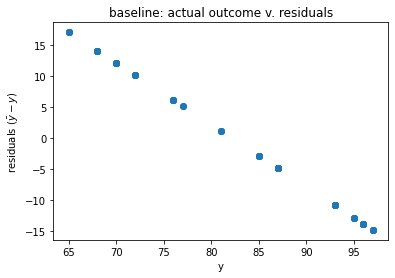

In [68]:
plt.scatter(df_model_evals.y, df_model_evals.base_residuals)
plt.title('baseline: actual outcome v. residuals')
plt.xlabel('y')
plt.ylabel('residuals ($\\bar{y} - y)$');

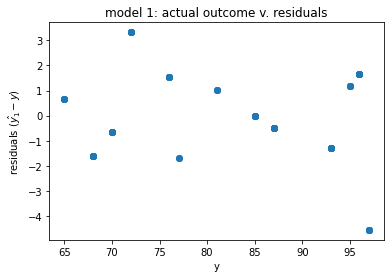

In [69]:
plt.scatter(df_model_evals.y, df_model_evals.residuals1)
plt.title('model 1: actual outcome v. residuals')
plt.xlabel('y')
plt.ylabel('residuals ($\hat{y_1} - y)$');

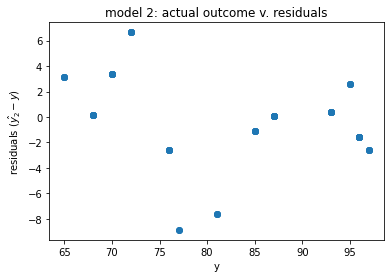

In [70]:
plt.scatter(df_model_evals.y, df_model_evals.residuals2)
plt.title('model 2: actual outcome v. residuals')
plt.xlabel('y')
plt.ylabel('residuals ($\hat{y_2} - y)$');

#### 3. Visualize the actual vs the predicted values. Create a seperate visualization for each model.

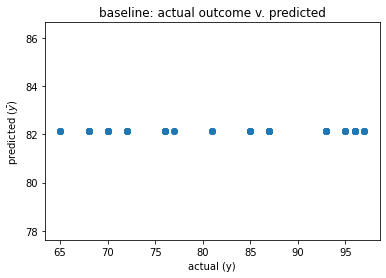

In [71]:
plt.scatter(df_model_evals.y, df_model_evals.baseline)
plt.title('baseline: actual outcome v. predicted')
plt.xlabel('actual (y)')
plt.ylabel('predicted ($\\bar{y}$)');

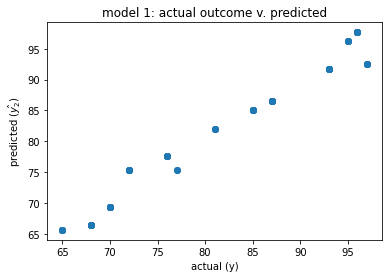

In [72]:
plt.scatter(df_model_evals.y, df_model_evals.yhat)
plt.title('model 1: actual outcome v. predicted')
plt.xlabel('actual (y)')
plt.ylabel('predicted ($\hat{y_2}$)');

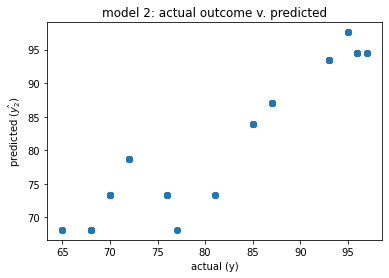

In [73]:
plt.scatter(df_model_evals.y, df_model_evals.yhat2)
plt.title('model 2: actual outcome v. predicted')
plt.xlabel('actual (y)')
plt.ylabel('predicted ($\hat{y_2}$)');

### __Bonus__
#### Combine the seperate visualizations for each model into a single visualization. Is this visual helpful?

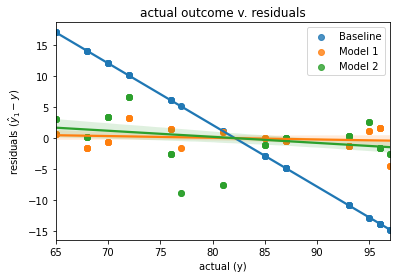

In [74]:
sns.regplot(df_model_evals.y, df_model_evals.base_residuals, label='Baseline')
sns.regplot(df_model_evals.y, df_model_evals.residuals1, label='Model 1')
sns.regplot(df_model_evals.y, df_model_evals.residuals2, label='Model 2')
plt.title('actual outcome v. residuals')
plt.legend()
plt.xlabel('actual (y)')
plt.ylabel('residuals $(\hat{y}_1 - y)$');

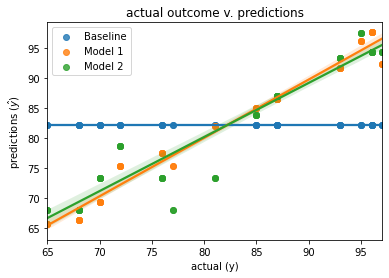

In [75]:
sns.regplot(df_model_evals.y, df_model_evals.baseline, label='Baseline')
sns.regplot(df_model_evals.y, df_model_evals.yhat, label='Model 1')
sns.regplot(df_model_evals.y, df_model_evals.yhat2, label='Model 2')
plt.title('actual outcome v. predictions')
plt.legend()
plt.xlabel('actual (y)')
plt.ylabel('predictions ($\hat{y}$)');

## 5. Create a model that uses `exam1` and `exam3` to predict `final_grade`. How does this model compare to your previous ones?

In [76]:
ols_model = ols('final_grade ~ exam1 + exam3', data=train).fit()

In [79]:
df_model_evals['yhat3'] = ols_model.predict(train[['exam1', 'exam3']])
df_model_evals['residuals3'] = df_model_evals.yhat3 - df_model_evals.y
rmse3 = sqrt(mean_squared_error(df_model_evals.y, df_model_evals.yhat3))

In [80]:
# Compare RMSE value of all models
print(f"Baseline RMSE: {rmseb:.2f}")
print(f"Model 1 RMSE: {rmse1:.2f}")
print(f"Model 2 RMSE: {rmse2:.2f}")
print(f'Model 3 RMSE {rmse3:.2f}')

Baseline RMSE: 11.06
Model 1 RMSE: 1.83
Model 2 RMSE: 3.47
Model 3 RMSE 1.65


In [82]:
# Calculate R^2 value of all models
brsquared = explained_variance_score(df_model_evals.y, df_model_evals.baseline)
rsquared1 = explained_variance_score(df_model_evals.y, df_model_evals.yhat)
rsquared2 = explained_variance_score(df_model_evals.y, df_model_evals.yhat2)
rsquared3 = explained_variance_score(df_model_evals.y, df_model_evals.yhat3)

# Compare R^2 value of all models
print(f"Baseline R^2: {brsquared:.2%}")
print(f"Model 1 R^2: {rsquared1:.2%}")
print(f"Model 2 R^2: {rsquared2:.2%}")
print(f'Model 3 R^2: {rsquared3:.2%}')

Baseline R^2: 0.00%
Model 1 R^2: 97.25%
Model 2 R^2: 90.13%
Model 3 R^2: 97.76%


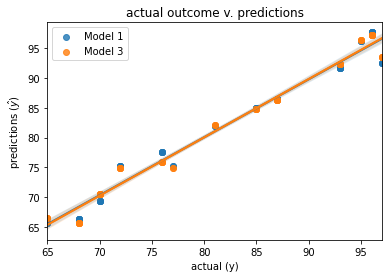

In [83]:
sns.regplot(df_model_evals.y, df_model_evals.yhat, label='Model 1')
sns.regplot(df_model_evals.y, df_model_evals.yhat3, label='Model 3')
plt.title('actual outcome v. predictions')
plt.legend()
plt.xlabel('actual (y)')
plt.ylabel('predictions ($\hat{y}$)');

## 6. Take your best preforming model and measure its performance on the validate data set. How does the performance differ between train and validate?

In [84]:
X_validate = validate.drop(columns='final_grade')
y_validate = validate.final_grade
X_test = test.drop(columns='final_grade')
y_test = test.final_grade

In [85]:
validate_pred = ols_model.predict(validate[['exam1', 'exam3']])
rmse_validate = sqrt(mean_squared_error(y_validate, validate_pred))
rsquared4 = explained_variance_score(y_validate, validate_pred)

In [86]:
print("Model 3")
print('-' * 7)
print(f"train RMSE {mse3:.2f}")
print(f"validate RMSE: {rmse_validate:.2f}")

Model 3
-------
train RMSE 1.65
validate RMSE: 1.87


In [87]:
print("Model 3")
print('-' * 7)
print(f"train R^2: {rsquared3:.2%}")
print(f"validate R^2: {rsquared4:.2%}")

Model 3
-------
train R^2: 97.76%
validate R^2: 97.01%


## 7. Make a 4th model with a slight difference like one more/less feature or a single hyperparameter that's different to see if you can beat that the last model's performance on validate.

In [88]:
PolynomialFeatures()

## 8. Tune your models using validate to improve performance. Select the model w/ the best performance and evaluate that one on test, to get a more clear understanding of how it will perform on out-of-sample data.